In [1]:
import os
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
input_dir = '../input/'
working_dir = '../working/'
output_dir = '../output/'

## Read data

In [3]:
def read_track(line_name='a'):
    track_df = pd.read_csv(os.path.join(input_dir, 'track_{}.csv'.format(line_name.upper())))
    col_names_track = ['date', 'kilo', 'lev_l', 'lev_r', 'cur_l', 'cur_r', 'cant', 'width', 'speed']
    track_df.columns = col_names_track
    track_df['date'] = pd.to_datetime(track_df['date'])
    print('shape: {}'.format(track_df.shape))
    return track_df

In [4]:
track_a = read_track('a')
track_a.head()

shape: (10185690, 9)


,date,kilo,lev_l,lev_r,cur_l,cur_r,cant,width,speed
0,2017-04-01,10000,-1.16,-0.23,1.20,1.20,0.83,3.89,84.0
1,2017-04-01,10001,-1.17,-0.30,1.88,1.88,0.67,4.63,84.0
2,2017-04-01,10002,-1.09,-0.19,2.30,2.30,0.50,5.33,84.0
3,2017-04-01,10003,-0.64,0.20,2.28,2.28,0.46,5.90,84.0
4,2017-04-01,10004,0.47,0.89,1.74,1.74,0.62,6.38,84.5


In [5]:
def read_equ(line_name='a'):
    equ_df = pd.read_csv(os.path.join(input_dir, 'equipment_{}.csv'.format(line_name.upper())))
    col_names_equ = ['kilo', 'is_ballast', 'is_long', 'sleeper_type', 'is_bridge', 'is_crossing', 'gross_ton', 'radius', 'is_unreliable']
    equ_df.columns = col_names_equ
    print('shape: {}'.format(equ_df.shape))
    return equ_df

In [6]:
equ_a = read_equ('a')
equ_a.head()

shape: (27906, 9)


,kilo,is_ballast,is_long,sleeper_type,is_bridge,is_crossing,gross_ton,radius,is_unreliable
0,10000,1,1,3,0,0,13.607,0,1
1,10001,1,1,3,0,0,13.607,0,1
2,10002,1,1,3,0,0,13.607,0,1
3,10003,1,1,3,0,0,13.607,0,1
4,10004,1,1,1,0,0,13.607,0,1


## lev_l

In [25]:
def plot_mean_by_kilo(track=track_a):
    lev_l_gb_count = track.groupby('kilo')['lev_l'].count().rename('count')
    lev_l_gb_mean = track.groupby('kilo')['lev_l'].mean().rename('mean')
    lev_l_gb_std = track.groupby('kilo')['lev_l'].std().rename('std')
    lev_l_gb_conf95_top = (lev_l_gb_mean + 1.96 * lev_l_gb_std).rename('conf95_top')
    lev_l_gb_conf95_btm = (lev_l_gb_mean - 1.96 * lev_l_gb_std).rename('conf95_btm')
    # plot
    fig, ax1 = plt.subplots(figsize=(40,3))
    ax1.plot(lev_l_gb_mean.index, lev_l_gb_mean)
    ax1.plot(lev_l_gb_mean.index, lev_l_gb_conf95_top)
    ax1.plot(lev_l_gb_mean.index, lev_l_gb_conf95_btm)
    ax2 = ax1.twinx()
    ax2.plot(lev_l_gb_count.index, lev_l_gb_count)
    ax2.set_ylim(top=1500)
    ax1.set_xlabel('kilo')
    ax1.set_ylabel('lev_l')
    ax2.set_ylabel('count')
    h1, l1 = ax1.get_legend_handles_labels()
    h2, l2 = ax2.get_legend_handles_labels()
    ax1.legend(h1+h2, l1+l2, loc='upper right')

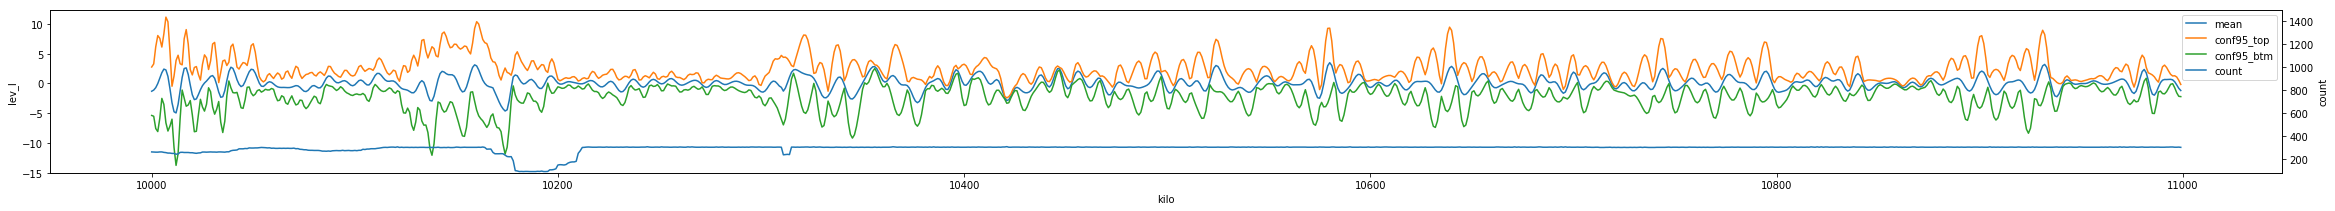

In [28]:
plot_mean_by_kilo(track_a.query('kilo<11000'))

In [19]:
lev_l_gb_count = track_a.groupby('kilo')['lev_l'].count().rename('count')
lev_l_gb_mean = track_a.groupby('kilo')['lev_l'].mean().rename('mean')
lev_l_gb_std = track_a.groupby('kilo')['lev_l'].std().rename('std')
lev_l_gb_conf95_top = (lev_l_gb_mean + 1.96 * lev_l_gb_std).rename('conf95_top')
lev_l_gb_conf95_btm = (lev_l_gb_mean - 1.96 * lev_l_gb_std).rename('conf95_btm')

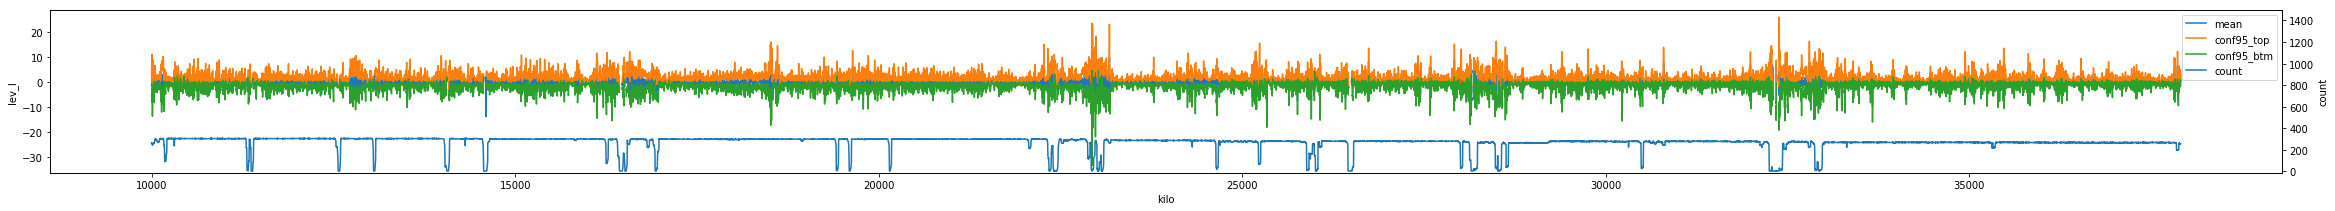

In [20]:
fig, ax1 = plt.subplots(figsize=(40,3))
ax1.plot(lev_l_gb_mean.index, lev_l_gb_mean)
ax1.plot(lev_l_gb_mean.index, lev_l_gb_conf95_top)
ax1.plot(lev_l_gb_mean.index, lev_l_gb_conf95_btm)
ax2 = ax1.twinx()
ax2.plot(lev_l_gb_count.index, lev_l_gb_count)
ax2.set_ylim(top=1500)
ax1.set_xlabel('kilo')
ax1.set_ylabel('lev_l')
ax2.set_ylabel('count')
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc='upper right')

In [ ]:
track_full_a = track_a.merge(equ_a, how='left', on='kilo')
track_full_a.head()